# Сравнение решений системы мелкой воды и ассимптотик
Сравним решения с ассимптитокой:
    $u(x,t) = \frac{1}{2}\Sigma_{\pm}\sqrt{\frac{c_0}{c(x)}} 
    V(\frac{c_0(T^{\pm}(x)\mp t)}{\mu}) + O(\mu|log\mu|)$

Решения уравнения переноса :

$c(x) = x^2; V(x) = e^{-(\frac{x-x_0}{\mu})^2}$
 1. $\eta_{l*}(x, t, x_0, m) = \frac{1}{2(1\pm xt)^2}e^{-\frac{1}{\mu^2}(\frac{x}{1\pm xt} -x_0)^2}$
 2. $\eta_{l}(x, t, x_0, m) = \frac{1}{2}e^{-\frac{1}{\mu^2}(\frac{x}{1\pm xt} -x_0)^2)}$
 3. $\eta_{l_w}(x, t, x_0, m) = \frac{1}{2(1\pm xt)}e^{-\frac{1}{\mu^2}(\frac{x}{1\pm xt} -x_0)^2}$  

In [126]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')
x, t, a, m = sp.symbols('x t a m')
#solutions of move equation
#for l*
mu = m
u_0 = sp.exp(-((x-a)/mu)**2)
u_l1 = 0.5*(sp.exp(-(((x)/(1+x*t)-a)/mu)**2) + sp.exp(-(((x)/(1-x*t)-a)/mu)**2))
display("u_l:", u_l1)
# for l
u_l2 = 0.5*((1+x*t)**(-2)*sp.exp(-((x/(1+x*t)-a)/mu)**2) + (1-x*t)**(-2)*sp.exp(-((x/(1-x*t)-a)/mu)**2))
display("u_l*:", u_l2)
#for lw
u_l3 = 0.5*((1+x*t)**(-1)*sp.exp(-((x/(1+x*t)-a)/mu)**2) + (1-x*t)**(-1)*sp.exp(-((x/(1-x*t)-a)/mu)**2))
display("u_w:", u_l3)
c_0 = a**2
U = 0.5*(sp.sqrt(c_0/x**2) * sp.exp(-(c_0*(1/a - 1/x + t)/mu)**2) + sp.sqrt(c_0/x**2) * sp.exp(-(c_0*(1/a - 1/x - t)/mu)**2))
display("U:", U)
u0 = (sp.lambdify((x, a, m), u_0, 'numpy'))
ul1 = (sp.lambdify((x, t, a, mu), u_l1, 'numpy'))
ul2 = (sp.lambdify((x, t, a, mu), u_l2, 'numpy'))
ul3 = (sp.lambdify((x, t, a, mu), u_l3, 'numpy'))
U = (sp.lambdify((x, t, a, mu), U, 'numpy'))

#Visualization
    
    
def var_a(a, t, mu):
    try:
        XX = np.linspace(-50, 50, 1000)
        vals_u0 = u0(XX, a, mu)
        vals_ul1= ul1(XX, t, a, mu)
        vals_ul2= ul2(XX, t, a, mu)
        vals_ul3= ul3(XX, t, a, mu)
        vals_U = U(XX, t, a, mu)
        plt.figure(figsize=(10, 4))
        plt.grid()
        plt.plot(XX, vals_u0, label="u0(x, a, mu)")
    
        plt.plot(XX, vals_ul1, label=f"ul*(x, t)")
        plt.plot(XX, vals_ul2, label=rf"$u_l(x, t)$")
        plt.plot(XX, vals_ul3, label=rf"$u_lw(x, t)$")
        plt.plot(XX, vals_U, label=rf"U(x, t)")
        plt.legend(fontsize=15)
        plt.title(f"Var: [a={a}] [t = {t}] \n [mu = {mu}]", fontsize=20)
        plt.xlabel("x", fontsize=15)
        plt.show()
        
        plt.figure(figsize=(10, 4))
        plt.grid()
        plt.plot(XX, vals_ul3, label=rf"$u_lw(x, t)$")
        plt.plot(XX, vals_U, label=rf"U(x, t)")
        plt.title(f"Var: [a={a}] [t = {t}] \n [mu = {mu}]", fontsize=20)
        plt.xlabel("x", fontsize=15)
        plt.legend()
        plt.show()
    except Exception:
        print("Unsupperted params...")

interact(var_a, a = (-5, 5, 0.01), t = (0, 0.7, 0.01), mu = (0.05, 0.4, 0.01))

'u_l:'

0.5*exp(-(-a + x/(t*x + 1))**2/m**2) + 0.5*exp(-(-a + x/(-t*x + 1))**2/m**2)

'u_l*:'

0.5*exp(-(-a + x/(t*x + 1))**2/m**2)/(t*x + 1)**2 + 0.5*exp(-(-a + x/(-t*x + 1))**2/m**2)/(-t*x + 1)**2

'u_w:'

0.5*exp(-(-a + x/(t*x + 1))**2/m**2)/(t*x + 1) + 0.5*exp(-(-a + x/(-t*x + 1))**2/m**2)/(-t*x + 1)

'U:'

0.5*sqrt(a**2/x**2)*exp(-a**4*(t - 1/x + 1/a)**2/m**2) + 0.5*sqrt(a**2/x**2)*exp(-a**4*(-t - 1/x + 1/a)**2/m**2)

interactive(children=(FloatSlider(value=0.0, description='a', max=5.0, min=-5.0, step=0.01), FloatSlider(value…

<function __main__.var_a(a, t, mu)>

# Bessel functions

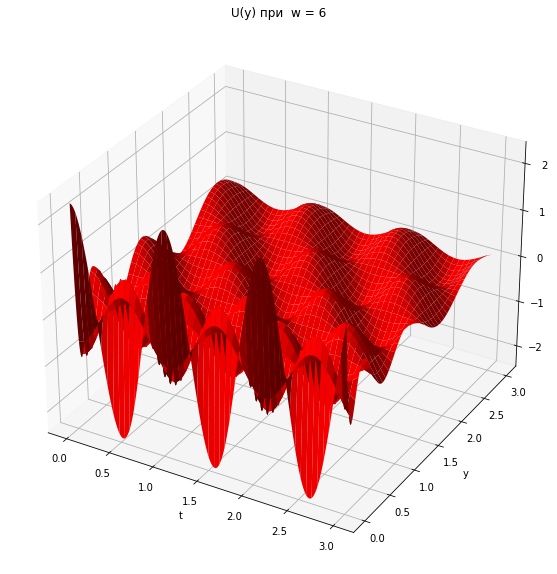

In [3]:
from math import exp, log, sqrt, fabs, sin, cos
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import j0
from scipy.special import j1
import numpy as np


def N(t, y, w):
  return sqrt(w) * cos(w*t) * j0(2*w*sqrt(y))


def U(t, y, w):
  return 1 / sqrt(y) * sin(w*t) * j1(2*w*sqrt(y))

w = 6

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

y = np.linspace(0.001, 3, 1000)
t = np.linspace(0.001, 3, 1000)

data_N = np.zeros((len(y), len(t)))
data_U = np.zeros((len(y), len(t)))
for i in range(len(y)):
  for j in range(len(t)):
    data_N[i][j] = N(t[j], y[i], w)
    data_U[i][j] = U(t[j], y[i], w)

t, y = np.meshgrid(t, y)
ax.plot_surface(t, y, data_N, color="r")
ax.set_title('U(y) при  w = ' + str(w))
ax.set_xlabel("t")
ax.set_ylabel("y")
plt.show()
